# DSA5101 - Introduction to Big Data for Industry


**Prepared by *Dr Li Xiaoli*** 

# Support Vector Machines (SVMs)

## Introduction: SVMs are supervised learning techniques that analyze data used for both classification and regression analysis. 

## SVM for Classification

## Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

## An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap (hyperplane) that is as wide as possible, i.e. maximizing the margin between two classes. 

## New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap (hyperplane) they fall on.

![image info](http://www.alivelearn.net/wp-content/uploads/2009/10/svm_linear_2class.png)

# SVM can be used for both classification (SVC) and Regression (SVR)

In [1]:
from sklearn import svm

# 1.  SVM for classification (SVC)

In [2]:
help (svm.SVC)    # SVC: Support Vector Classification

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 


# Class SVC in module sklearn.svm.classes:

 class SVC(sklearn.svm.base.BaseSVC). C-Support Vector Classification.
> The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.
  
> The multiclass support is handled according to a one-vs-one scheme.
 
> **Parameters**
>> C : float, optional (default=1.0).
Penalty parameter C of the error term. The strength of the regularization is inversely proportional to C

>> **kernel : string, optional (default='rbf')
 Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. If none is given, 'rbf' will be used.** 
  
>> degree : int, optional (default=3)
Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.
  
>> gamma : float, optional (default='auto')
Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
If gamma is 'auto' then 1/n_features will be used instead.
  
>> coef0 : float, optional (default=0.0)
Independent term in kernel function.
It is only significant in 'poly' and 'sigmoid'.

>> shrinking : bool, default=True
Whether to use the shrinking heuristic.

>> cache_size : float, optional
 Specify the size of the kernel cache (in MB).

>> probability : boolean, optional (default=False)
 Whether to enable probability estimates. This must be enabled prior
 to calling `fit`, and will slow down that method.
  
 
>> tol : float, optional (default=1e-3)
Tolerance for stopping criterion.
 
 
 

 
>> class_weight : {dict, 'balanced'}, optional
Set the parameter C of class i to class_weight[i]\*C for
SVC. If not given, all classes are supposed to have
weight one.

  
>> verbose : bool, default: False
Enable verbose output. Note that this setting takes advantage of a
per-process runtime setting in libsvm that, if enabled, may not work
properly in a multithreaded context.

>> max_iter : int, optional (default=-1)
Hard limit on iterations within solver, or -1 for no limit.

>> **decision_function_shape : 'ovo', 'ovr' or None, default=None
 Whether to return a one-vs-rest ('ovr') decision function of shape
(n_samples, n_classes) as all other classifiers, or the original
one-vs-one ('ovo') decision function of libsvm which has shape
(n_samples, n_classes * (n_classes - 1) / 2).
The default of None will currently behave as 'ovo' for backward
compatibility and raise a deprecation warning, but will change 'ovr'
in 0.18.**
 
>> random_state : int seed, RandomState instance, or None (default)
The seed of the pseudo random number generator to use when
shuffling the data for probability estimation.
 
> **Attributes**

>> **support_ : array-like, shape = [n_SV]
Indices of support vectors.**
  
>> **support_vectors_ : array-like, shape = [n_SV, n_features]
Support vectors.**
 
>> **n_support_ : array-like, dtype=int32, shape = [n_class]
Number of support vectors for each class.**
  
>> dual_coef_ : array, shape = [n_class-1, n_SV]
   Coefficients of the support vector in the decision function.
 For multiclass, coefficient for all 1-vs-1 classifiers.
The layout of the coefficients in the multiclass case is somewhat
non-trivial. See the section about multi-class classification in the
SVM section of the User Guide for details.
  
>> coef_ : array, shape = [n_class-1, n_features]
Weights assigned to the features (coefficients in the primal
 problem). This is only available in the case of a linear kernel.

>> `coef_` is a read-only property derived from `dual_coef_` and
 `support_vectors_`.


>  **SVR
 Support Vector Machine for Regression implemented using libsvm.**
 
>> **LinearSVC
Scalable Linear Support Vector Machine for classification
 implemented using liblinear. Check the See also section of
LinearSVC for more comparison element.**

>> ...............


## 1.1 A Simple Example for Binary Classification: Using default Kernel

In [3]:
# Prepare a simple training data
X = [[0, 0], [1, 1]]  # 2 2-D vector
y = [0, 1]            # 2 correspondng labels
# example [0, 0] with label 0, while example [1, 1]] with label 1

In [4]:
clf = svm.SVC()       # Build a SVM classier  
clf.fit(X, y)         # Fit the training data X and corresponding labels y

SVC()

In [5]:
# After being fitted to training data, the model can then be used to predict labeles for 
# newly given test/unlabelled examples
clf.predict([[2, 2]])
# Can you guess what the label should be the given example [2, 2]?

array([1])

In [6]:
# How about [0.2, 0.2]
clf.predict([[0.3, 0.3]])

array([0])

### SVMs decision function depends on a subset of the training data, 
### called the support vectors.
### Some properties of these support vectors can be found in attributes 
### support_vectors_, support_ and n_support:

### Attributes 

In [7]:
# get support vectors
clf.support_vectors_

# we only have two training examples, and one for each class
# Thus, they are all support vectors, and we have two support vectors, i.e. 

array([[0., 0.],
       [1., 1.]])

In [8]:
# get indices of support vectors
clf.support_ 
# The indices are 0 and 1 respectively

array([0, 1])

In [9]:
# get number of support vectors for each class
clf.n_support_ 
# Each class get 1 support vector

array([1, 1])

## 1.2 Second Example for Binary Classification: Using the Linear Kernel

In [10]:
import numpy as np

# Prepare a training data set with 11 examples, each represented as a 3-D vector
X = np.array([[-1, -1, -1], [-3, -3, -3], [-99, -100, -101], [-999, -1000, -1001],
              [-9999, -10000, -10001],[-99999, -10000, -10001],[-999999, -100000, -100001],
              [2, 1, 3], [1, 1, 2], [99, 100, 101], [999, 1000, 1001]]) #11 3-D training examples
y = np.array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])  # 11 labels, belonging to two classes, 1 and 2; 
# First 7 examples with class 1, while the remaining 4 examples with class 2

In [11]:
# I would like to choose linear kernel (default rbf model)
# from sklearn import svm
clf = svm.SVC(kernel='linear')   # Build SVM classifier with linear kernel
clf.fit(X, y)                    # fit the training data X and labels y

SVC(kernel='linear')

In [12]:
print(clf.predict([[3, 1, 2]]))

[2]


In [13]:
print(clf.predict([[-100, -20, -75]]))

[1]


In [14]:
# get support vectors
clf.support_vectors_
# The below two support vectors (each row is a support vector) near the class boundary

array([[-1., -1., -1.],
       [ 1.,  1.,  2.]])

In [15]:
# get indices of support vectors
clf.support_
# The indices are 0 and 8 respectively; index starting with 0 ([-1., -1., -1.])
# and [1, 1, 2]'s index is 8

array([0, 8])

In [16]:
clf.n_support_ 
#Each class get 1 support vector. While we have 11 examples, we only have 2 support vectors 
#that near class boundary

array([1, 1])

## 1.3 A Simple Example for Multi-class classification

### SVC and NuSVC implement the “one-against-one” approach (Knerr et al., 1990) 
###  for multi-class classification.
### If _n_ is the number of classes, then _n_ * (_n_ - 1) / 2 classifiers are constructed and each one trains data from two classes. 
### To provide a consistent interface with other classifiers, 
### the decision_function_shape option allows to aggregate the results of 
### the “one-against-one” classifiers to a decision function of shape (n_samples, n_classes):

In [17]:
X = [[0, 0], [0, 1], [1, 1], [1, 2], [2, 2],[2, 3], [3, 3], [3, 4]]
y = [0, 0, 1, 1, 2, 2, 3, 3]
# 8 training examples with 4 UNIQUE labels (0, 1, 2, 3), i.e. 4 class/category classification problem

### 1.3.1 ovo: one-vs-one

This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected. Since it requires to fit _n_ * (_n_ - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its _O(n^2) complexity, where n is the number of classes

In [18]:
# decision_function_shape='ovo' indicates that we build one-against-one classifiers
clf = svm.SVC(decision_function_shape='ovo')  
clf.fit(X, y)

SVC(decision_function_shape='ovo')

In [19]:
# Classification/Prediction
print(clf.predict([[1.5, 1.5]]))

[1]


In [20]:
# Classification/Prediction
print(clf.predict([[3.5, 3.5]]))

[3]


In [21]:
dec = clf.decision_function([[1.5, 1.5]])

In [22]:
dec.shape[1]    # 4 classes: 4*(4-1)/2 = 6, i.e. 6 decision functions, according to 1 vs 1 fashion

6

### 1.3.2 ovr: one-vs-rest

Also known as one-vs-rest/all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (_O_(_n_), as only _n_ classifiers are needed). This is the most commonly used strategy for multiclass classification and is a fair default choice.

In [23]:
# decision_function_shape='ovr' indicates that we build one-against-rest classifiers
clf.decision_function_shape = "ovr"
clf.fit(X, y) 

SVC()

In [24]:
print (X)
print (y)

[[0, 0], [0, 1], [1, 1], [1, 2], [2, 2], [2, 3], [3, 3], [3, 4]]
[0, 0, 1, 1, 2, 2, 3, 3]


In [25]:
# Classification/Prediction
print(clf.predict([[1.5, 1.5]]))

[1]


In [26]:
# Classification/Prediction
print(clf.predict([[3.5, 3.5]]))

[3]


In [27]:
dec = clf.decision_function([[1.5, 1.5]])
dec.shape[1] # 4 classes and 4 classifiers,  according to 1 vs rest fashion

4

### 1.3.3 LinearSVC implements “one-vs-the-rest” default multi-class strategy, training _n_ models. Clearly, it uses linear model (as its name shows)

In [28]:
lin_clf = svm.LinearSVC()  #Note the difference with svm.SVC whether you can choose from different kernels
lin_clf.fit(X, y) 

LinearSVC()

In [29]:
# Classification/Prediction
print(clf.predict([[1.5, 1.5]]))

[1]


In [30]:
# Classification/Prediction
print(clf.predict([[3.5, 3.5]]))

[3]


In [31]:
dec = lin_clf.decision_function([[1.5, 1.5]])
dec.shape[1]  # 4 classes and 4 classifiers,  according to 1 vs rest fashion using linear kernel

4

# 2.   SVM for Regression (SVR) 

In [32]:
from sklearn import svm

# Prepare training data- note label y consists of real-values, so we are doing regression
X = [[0, 0], [0.2, 0.3], [0.5, 0.7], [1.0, 1.2], [1.2, 1.4], [1.4, 1.6],
     [1.6, 1.8], [1.8, 2]]
y = [0.1, 0.25, 0.6, 1.1, 1.3, 1.45, 1.7, 1.9]

## Note our target variable y's values - NOT Discrete CLASS LABEL; 
## Instead, they are continous/numeric/real values

In [33]:
clf = svm.SVR()  # We want to build SVR model
clf.fit(X, y)    # by default, we also use rbf kernel

SVR()

In [34]:
# Regression/Prediction
clf.predict([[0.5, 0.8]])

array([0.73803486])

In [35]:
# Regression/Prediction
clf.predict([[1, 1]])

array([1.0403844])

In [36]:
# Regression/Prediction
clf.predict([[2, 1.5]])

array([1.56944981])

In [37]:
# Let us change to linear kernel
clf = svm.SVR(kernel='linear')
clf.fit(X, y)

SVR(kernel='linear')

In [38]:
clf.predict([[0.5, 0.8]])

array([0.70385324])

In [39]:
clf.predict([[1, 1]])

array([1.00715599])

In [40]:
clf.predict([[2, 1.5]])

array([1.65899085])

### You notice that the process is same with classification. The only differences are 
* 1. We use SVR 
* 2. Labels are real values (training data looks different)

# 3. One Class SVM          

In [41]:
import numpy as np  # We will generate some numbers
from sklearn import svm
import matplotlib.pyplot as plt   # We will visulize the results. 
import matplotlib.font_manager

## 3.1 Prepare/generate data: understand linspace function
### linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
### Returns `num` evenly spaced samples, calculated over the interval [`start`, `stop`].

In [42]:
help (np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [43]:
np.linspace(2.0, 3.0, num=5)
# Generate 5 numbers from 2 to 3 (inclusive)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [44]:
#endpoint=False
np.linspace(2.0, 3.0, num=5, endpoint=False)
# We want 5 numbers, but we do not want to include endpoint 3 , as endpoint=False

array([2. , 2.2, 2.4, 2.6, 2.8])

In [45]:
#What if I want to know the step?
np.linspace(2.0, 3.0, num=5, retstep=True) #inclusive endpoint
#retstep : bool, optional
# If True, return both (`samples`, `step`), where `step` is the spacing between samples.

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

In [46]:
## Graphical illustration

In [47]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)   # Generate zeros (N)
y

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
# Generate 8 numbers, starting with 0, ending with 10, inclusive endpoint
x1 = np.linspace(0, 10, N, endpoint=True)
x1

array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
        7.14285714,  8.57142857, 10.        ])

In [49]:
# Generate 8 numbers, starting with 0, ending with 10, exclusive endpoint
x2 = np.linspace(0, 10, N, endpoint=False)
x2

array([0.  , 1.25, 2.5 , 3.75, 5.  , 6.25, 7.5 , 8.75])

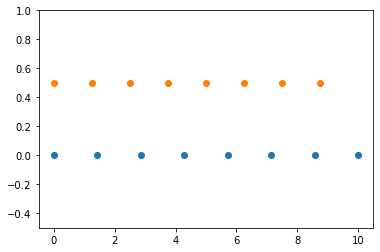

In [50]:
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')   # y+0.5 and we use x2
plt.ylim([-0.5, 1]) # Y-axis limits
plt.show()

## 3.2 Prepare data: understand meshgrid function
### meshgrid: Return coordinate matrices from coordinate vectors

In [51]:
# help (np.meshgrid)

In [52]:
#nx, ny = (3, 2)
#print (nx)
#print (ny)
#generate 3 numbers from [0, 1]
#x = np.linspace(0, 1, nx)
#x
#generate 2 numbers from [0, 1]
#y = np.linspace(0, 1, ny)
#y
# x=[0, 0.5, 1]
# y=[0, 1]
#xv, yv = np.meshgrid(x, y)
#xv
#yv
#xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
#xv
#yv

In [53]:
x = np.arange(-5, 5, 0.1)  # from -5 to 5 (exclusive) with step 0.1
y = np.arange(-5, 5, 0.1) # from -5 to 5 (exclusive) with step 0.1
xx, yy = np.meshgrid(x, y, sparse=True)

In [54]:
yy

array([[-5.00000000e+00],
       [-4.90000000e+00],
       [-4.80000000e+00],
       [-4.70000000e+00],
       [-4.60000000e+00],
       [-4.50000000e+00],
       [-4.40000000e+00],
       [-4.30000000e+00],
       [-4.20000000e+00],
       [-4.10000000e+00],
       [-4.00000000e+00],
       [-3.90000000e+00],
       [-3.80000000e+00],
       [-3.70000000e+00],
       [-3.60000000e+00],
       [-3.50000000e+00],
       [-3.40000000e+00],
       [-3.30000000e+00],
       [-3.20000000e+00],
       [-3.10000000e+00],
       [-3.00000000e+00],
       [-2.90000000e+00],
       [-2.80000000e+00],
       [-2.70000000e+00],
       [-2.60000000e+00],
       [-2.50000000e+00],
       [-2.40000000e+00],
       [-2.30000000e+00],
       [-2.20000000e+00],
       [-2.10000000e+00],
       [-2.00000000e+00],
       [-1.90000000e+00],
       [-1.80000000e+00],
       [-1.70000000e+00],
       [-1.60000000e+00],
       [-1.50000000e+00],
       [-1.40000000e+00],
       [-1.30000000e+00],
       [-1.2

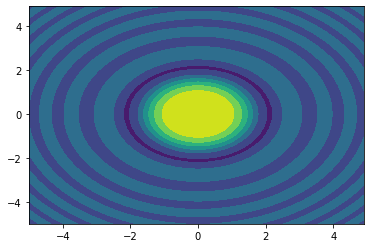

In [55]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)  # draw contour lines and filled contours
plt.show()

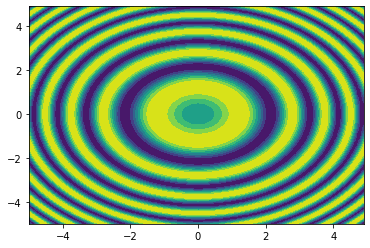

In [56]:
z = np.sin(xx**2 + yy**2) 
h = plt.contourf(x,y,z)  # draw contour lines and filled contours
plt.show()

## 3.3. Prepare data: understand normal distribution by using random.randn function
### np.random.randn

> Return a sample (or samples) from the standard **normal distribution.**

> If positive, int_like or int-convertible arguments are provided, `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1

> For random samples from : math:`N(\mu, \sigma^2)`, use:
``sigma * np.random.randn(...) + mu``

In [57]:
# Run this multiple times, each has different random value
np.random.randn()

0.24365852387478162

In [58]:
# Generate 2-by-4 array of samples
np.random.randn (2, 4)

array([[-0.6706095 , -1.66406091,  0.75163698,  0.70328234],
       [-0.03743616,  0.72139987, -2.18132805, -0.16654778]])

In [59]:
# For random samples from :math:N(\mu, \sigma^2), 
# 2-by-4 array of samples from N(3, 6.25), i.e. wih mu=3, sigma=2.5 (6.25=2.5^2)  
# The standard deviation is the square root of the variance, 6.25 is variance, 
# 2.5 is standard deviation sigma
# sigma * np.random.randn (...)   + mu
2.5     * np.random.randn (2, 4)  + 3
# mu=3, while sigma=2.5, variance =6.25

array([[ 3.64213352,  1.21282159,  2.24197229,  4.1121751 ],
       [ 2.31277864,  6.96319823,  0.7992421 , -3.29225844]])

In [60]:
# help (np.random.randn)

## 3.4 Prepare data: understand uniform distribution function by uniform function

> uniform(...) method of mtrand.RandomState instance
>> uniform(low=0.0, high=1.0, size=None)
    
> Draw samples from a uniform distribution.
    
>>Samples are uniformly distributed over the half-open interval ``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.


In [61]:
# help (np.random.uniform)

In [62]:
#Draw samples from the distribution:
# -1:  Lower boundary; 0:  upper boundary , 100 numbers
s = np.random.uniform(-1, 0, 100)
s

array([-0.23358352, -0.56492144, -0.81332154, -0.7334453 , -0.23425221,
       -0.04623988, -0.67248118, -0.32391833, -0.98719984, -0.20561181,
       -0.54790326, -0.52301212, -0.9346451 , -0.83203648, -0.37973282,
       -0.02793153, -0.23659403, -0.77412795, -0.12539   , -0.31159594,
       -0.77870858, -0.85795497, -0.96488339, -0.91372123, -0.49616076,
       -0.37343506, -0.35311793, -0.89384037, -0.15243585, -0.47699776,
       -0.94973053, -0.7080313 , -0.98899086, -0.85159481, -0.78906674,
       -0.524605  , -0.7502444 , -0.56750304, -0.47648566, -0.43554358,
       -0.74553884, -0.3426711 , -0.3702316 , -0.53912427, -0.79932075,
       -0.96448651, -0.76462633, -0.67842522, -0.82042295, -0.43705079,
       -0.98741326, -0.21650497, -0.65451939, -0.52235348, -0.87453362,
       -0.89622144, -0.96840365, -0.5279014 , -0.6485245 , -0.41624205,
       -0.44301672, -0.64480364, -0.13661423, -0.66574112, -0.23867147,
       -0.32913999, -0.71271669, -0.56515195, -0.46115786, -0.75

In [63]:
#All values are within the given interval:
np.all(s >= -1)

True

In [64]:
np.all(s < 0)

True

In [65]:
np.all(s > -0.5)

False

Next, we visualize the data in s according to its distributions

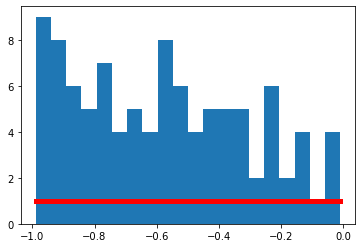

In [66]:
# Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 20)  # 20 bins
plt.plot(bins, np.ones_like(bins), linewidth=5, color='r')
plt.show()

# 3.5 Start to prepare data: for one Class SVM

In [67]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [68]:
xx

array([[-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       ...,
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ]])

## 1. Construct training data (normal distribution, with $\mu$=0, $\sigma$ =0.3)

In [ ]:
# 100-by-2 array of samples from N(0, 0.09): #(\mu=0, \sigma^2 =0.3^2)

In [ ]:
X = 0.3 * np.random.randn(100, 2) + 0

$\mu$=0, $\sigma$^2 =0.3^2=0.09  

Variance (𝜎^2 ) is the average squared deviations from the mean, while standard deviation (𝜎) is the square root of this number. 

In [70]:
X[0]

array([-0.07566563, -0.21163956])

In [71]:
# Generate 200 train data (normal distribution)
X_train = np.r_[X + 2, X - 2]     
# np.r_: Stack arrays into one
# X+2: 100 2D vectors
# X-2: 100 2D vectors
# X-2 is on the bottom of X+2
X_train

array([[ 1.92433437,  1.78836044],
       [ 2.64921532,  1.81264187],
       [ 1.9951823 ,  2.50708578],
       [ 1.75134808,  1.69010507],
       [ 2.11767109,  2.40648511],
       [ 2.21637253,  2.64166952],
       [ 1.6744219 ,  1.96429071],
       [ 2.09387614,  1.92748254],
       [ 1.82490506,  1.85940629],
       [ 1.69699821,  2.05640069],
       [ 2.78401697,  1.96399319],
       [ 2.20242223,  1.8189756 ],
       [ 2.60084307,  2.05194091],
       [ 1.71696867,  1.28866438],
       [ 1.71650367,  2.36859809],
       [ 2.1588175 ,  2.26013776],
       [ 2.13004358,  1.94999384],
       [ 2.32996847,  2.21411878],
       [ 2.21043587,  2.23103604],
       [ 2.13577536,  2.18591956],
       [ 2.26281466,  2.35142031],
       [ 2.59470159,  1.61815965],
       [ 1.65041423,  2.11877613],
       [ 2.03815956,  1.91951771],
       [ 2.27114409,  2.16616022],
       [ 2.32890969,  2.53899282],
       [ 1.63214843,  1.95029913],
       [ 1.52586172,  1.99249972],
       [ 1.85275591,

Data are centerred aroud [2, 2], [-2,-2]

In [72]:
X_train.shape

(200, 2)

## 2. Construct test data (normal distribution, with $\mu$=0, $\sigma$ =0.3)

In [73]:
# Generate 40 regular novel observations (normal distribution)
#20-by-2 array of samples from N(0, 0.09):
# Same \mu and \sigma
X = 0.3 * np.random.randn(20, 2)+0
X_test = np.r_[X + 2, X - 2]
# X+2: 20 2D vectors
# X-2: 20 2D vectors
X_test

array([[ 2.07765715,  1.51800047],
       [ 2.31096153,  2.08963316],
       [ 2.44457934,  1.86794448],
       [ 2.11944533,  2.11665333],
       [ 1.37058886,  2.22636433],
       [ 1.94766656,  1.64135214],
       [ 2.17451186,  1.97174066],
       [ 2.29051104,  2.21841403],
       [ 2.14354313,  2.20553866],
       [ 1.9110302 ,  1.81392581],
       [ 1.82300929,  1.76188809],
       [ 1.9579914 ,  1.40902404],
       [ 2.01512462,  2.34401506],
       [ 2.26016628,  2.37222189],
       [ 2.49684755,  1.69729891],
       [ 2.30723595,  1.76965948],
       [ 1.80707003,  2.35492845],
       [ 2.02087252,  2.04215124],
       [ 2.16625161,  2.07169577],
       [ 1.9477305 ,  2.43295213],
       [-1.92234285, -2.48199953],
       [-1.68903847, -1.91036684],
       [-1.55542066, -2.13205552],
       [-1.88055467, -1.88334667],
       [-2.62941114, -1.77363567],
       [-2.05233344, -2.35864786],
       [-1.82548814, -2.02825934],
       [-1.70948896, -1.78158597],
       [-1.85645687,

Data are centerred aroud [2, 2], [-2,-2]

In [74]:
X_test.shape

(40, 2)

## Note both of training and test data have the same normal distribution, with the same mean and same standard Deviation/Variance

# Below we will generate 40 abnormal novel observations (uniform distribution)
## Different distribution!!!
## Uniform distribution is different from normal distribution, 
## that is why we they could belong to outliers, although they may not always be

## 3. Construct outlier data set (uniform distribution) 

In [75]:
# Generate 40 examples, folloing uniform distribution
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2)) # Generate 20 2d data following 
X_outliers 

array([[ 0.41508948, -1.01389006],
       [-3.29736928, -1.35180815],
       [ 3.37529531,  2.56649417],
       [ 3.80254802,  3.75786516],
       [ 2.94887227, -3.3517249 ],
       [-0.39051056,  0.12849168],
       [ 3.11496726,  1.92845069],
       [ 0.83521705,  1.60115074],
       [ 3.98762224, -2.386794  ],
       [ 0.70173549, -3.36490421],
       [-3.92745368, -3.72113559],
       [ 0.10614365,  1.95745721],
       [ 3.4244976 ,  2.38834585],
       [-0.93366299,  0.08421657],
       [-3.30127485, -0.28564333],
       [ 1.13842342,  1.77221833],
       [ 1.09189603, -3.10731479],
       [-0.71698594,  1.58932736],
       [-3.84317557,  0.88369961],
       [-3.53439484,  0.84853842]])

Data are distributed uniformly [-4,4]

In [76]:
X_outliers.shape

(20, 2)

## 3.6 Build One Class SVM Classifier 

In [77]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)    # Build One Class SVM, with rbf kernel
# nu is a important parameter
# nu : float, default=0.5
# An upper bound on the fraction of training errors and 
# a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5
# If you set it to 0.1, you are guaranteed to find at most 10% of your training examples 
# being misclassified (you keep 90% of positive data correctly classify) and 
# at least 10% of your training examples being support vectors (could be classified wrongly). 
# This parameter is extremely important for the one class or positive class boundary
clf.fit(X_train)  # fit the model using training data

OneClassSVM(gamma=0.1, nu=0.05)

In [78]:
help(svm.OneClassSVM)

Help on class OneClassSVM in module sklearn.svm._classes:

class OneClassSVM(sklearn.base.OutlierMixin, sklearn.svm._base.BaseLibSVM)
 |  OneClassSVM(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Unsupervised Outlier Detection.
 |  
 |  Estimate the support of a high-dimensional distribution.
 |  
 |  The implementation is based on libsvm.
 |  
 |  Read more in the :ref:`User Guide <outlier_detection>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. If a callable is given it is
 |       used to precompute the kernel matrix.
 |  
 |  degree : int, default=3
 |      Degree of the polynomial kernel function ('poly').
 | 

### Make Prediction on 3 data sets, i.e. training, test and outliers data sets

### 1. training (normal)

In [79]:
y_pred_train = clf.predict(X_train)   # CLOSE TEST, i.e. predict the training data using the model
y_pred_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

### Examples are considered as outliers if their predicted labels are -1 
### In other words, training model represents normal distribution, so they should be labeled 1

In [80]:
# If prediction result is -1, meaning error. 
# Default label for training a One Class SVM is 1
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_train

8

### 2. Test (normal)

In [81]:
y_pred_test = clf.predict(X_test)  # Predict the test set (following normal distribution)
y_pred_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int64)

In [82]:
# If prediction result is -1, meaning error. 
# Default label for training a One Class SVM is 1
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_test

1

### 3. outlier (uniform distribution)

In [83]:
y_pred_outliers = clf.predict(X_outliers)   
# Predict the outlier examples (following uniform distribution)
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [84]:
# Default label for training a One Class SVM is 1
# Note for the outliers (different distributions), 
# their labels are supposed different from the training, i.e. should be -1
# So, if we predict them as class 1, then means error. 
# If we predict them as class -1, then our predictions are correct
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
n_error_outliers

0

## It means we identify outliers correctly (all outliers)

Next, we try to viualize all the data generated 

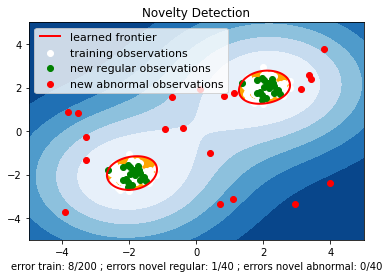

In [85]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

Examples following normal distribution will be centerred around (-2, -2) and (2, 2)
Examples following uniform distrubion could be anywhere [-4, 4]

### One classSVM will not try to classify all training examples correctly, although it aims to classify majarity training examples correctly.  

# One Class SVM Classifier can be used for anormaly detection, although it may not be always accurate

# Homework: You can tune different nu value and see how it affects the results